# Primeros pasos
Para empezar a usar las clases y funciones que hemos hecho en [RetratoDeFases.py](RetratoDeFases.py), deberemos importar el archivo. Esto se hace con la siguiente línea:


In [4]:
from RetratoDeFases import *
import numpy as np # También lo necesitaremos, pero para utilizar la función seno en un ejemplo

Una vez hecho esto, podemos utilizar las clases y funciones del archivo. Vamos a ver una serie de ejemplos de uso, haciendo retratos de fases de sistemas que hemos estudiado en clase, o que aparecen en el Strogatz.

## Ejemplo 1: Retrato de fases de un oscilador armónico (Example 5.1.1)

Lo primero que tenemos que hacer es crear una función que calcule la variación de cada una de las variables con el tiempo. En este caso, nuestro sistema arroja las siguientes expresiones:

$$
    \dot{x} = v \\
    \dot{v} = -\omega^2 x
$$

Donde $\omega$ es la frecuencia angular del oscilador.

Tendremos que escribir una función que recibe como parámetros $(x,v)$ y devuelva la expresión de su derivada, $(\dot{x},\dot{v})$.

In [31]:
w = 1.00 #Frecuencia angular del oscilador
def dFOscilador(x, y):
    return y, -w*w*x

También podriamos haber indicado a la función que $\omega$ es un parámetro, definiéndola de la siguiente manera:

In [32]:
def dFOscilador(x, y, *,w=1):
    # w = Frecuencia angular del oscilador
    return y, -w*w*x



Bien, ahora que tenemos la función que define nuestro sistema, podemos crear un objeto de la clase *RetratoDeFases2D* inicializándolo con la función de nuestro sistema, *dFOscilador*.

La clase *RetratoDeFases2D* tiene 3 parámetros obligatorios:
* La función de las derivadas, dF
* El rango de la representación, que puede indicarse de tres maneras:
1. Para representar sobre un dominio 'cuadrado', pasamos sólo el argumento `[limiteInferior , limiteSuperior]`. De esta manera los dos ejes tendrán el mismo rango.
        
2. Si queremos que tengan distinto rango, deberemos pasar el argumento de la siguiente manera:
            `[[limiteInferiorEjeX, limiteSuperiorEjeX], [limiteInferiorEjeY, limiteSuperiorEjeY]]`
            
3. Si queremos representar desde 0 hasta cierto número, sólo hará falta poner ese número (también vale si es negativo). Obviamente, no podemos poner solo cero.

Ahora que ya sabemos esto, creemos el objeto, y saquemos el gráfico, utilizando plot():

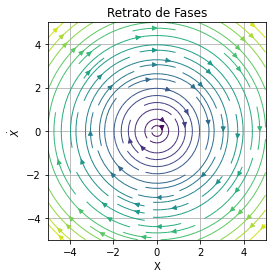

In [33]:
RetratoOscilador = RetratoDeFases2D(dFOscilador, [-5,5])
RetratoOscilador.plot()

El color indica mayor o menor velocidad de la trayectoria. Los colores más oscuros indican menor velocidad, mientras los más claros indican mayor velocidad.

Vamos a seguir viendo más ejemplos, utilizando más *features* de la clase RetratoDeFases2D.

## Ejemplo 2: Retrato de un sistema dado en coordenadas polares (Example 7.1.1)
El primer paso es escribir la función de las derivadas de $r$ y $\theta$:

In [34]:
def dFPolares(r, theta):
    return 0.5*r*(1 - r*r), 1+0*theta

Ahora, para indicar que estamos haciendo un *input* en coordenadas polares en vez de cartesianas, deberemos pasar el argumento adicional que indica que estamos realizando esto mismo:

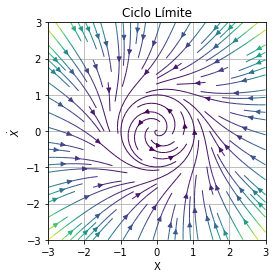

In [35]:
RetratoPolares = RetratoDeFases2D(dFPolares, [-3, 3], Polar=True, Titulo='Ciclo Límite')
RetratoPolares.plot()

También hemos pasado como argumento adicional el título del plot.

## Ejemplo 3: Love Affairs (Romeo y Julieta)
Podéis jugar con los parámetros e intentar los ejercicios del final del tema.

Os dejo hecho el primero, el ejercicio 5.3.2.
Como novedad, se introduce el cambio del nombre de las etiquetas de los ejes, además de la densidad, que controla la cercanía de las líneas de flujo.

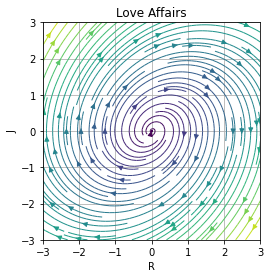

In [4]:
a = 2.0
b = 0.0
c = -2.0
d = 1.0

def dFLoveAffairs(R, J, *, a=1, b=0, c=-1, d=0):
    return a*J + b*R, c*R + d*J

RetratoLoveAffairs = RetratoDeFases2D(dFLoveAffairs, [-3, 3], dF_args={'a':a, 'b':b, 'c':c, 'd':d}, Densidad=1.5, Titulo='Love Affairs', xlabel='R', ylabel='J')
RetratoLoveAffairs.plot()

## Ejemplo 4: Rabbits vs Sheep

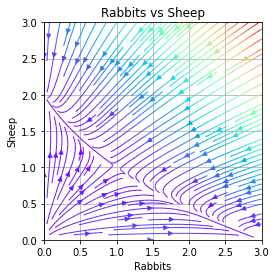

In [5]:
def dFRabbitsVsSheep(x, y):
    return x*(3-x-2*y), y*(2-x-y)

RetratoRabbitsVsSheep = RetratoDeFases2D(dFRabbitsVsSheep, 3, Densidad=1.5, Titulo='Rabbits vs Sheep', xlabel='Rabbits', ylabel='Sheep')
RetratoRabbitsVsSheep.plot()

## Ejemplo 5: Centro no lineal

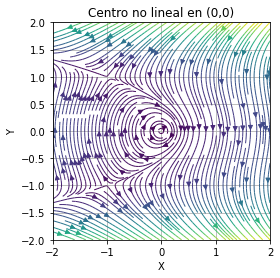

In [38]:
def dFCentroNoLineal(x, y):
    return y-y**3, -x-y**2

RetratoCentroNoLineal = RetratoDeFases2D(dFCentroNoLineal, [-2,2], Densidad=2, Titulo='Centro no lineal en (0,0)', xlabel='X', ylabel='Y')
RetratoCentroNoLineal.plot()

## Ejemplo 6: Oscilador de van der Pol (Ejercicio 6.1.8)

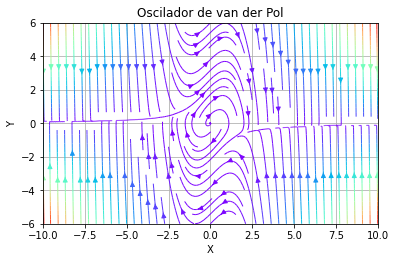

In [6]:
def dFVanDerPol(x, y):
    return y, -x + y*(1-x**2)

RetratoVanDerPol = RetratoDeFases2D(dFVanDerPol, [[-10, 10], [-6, 6]], Densidad=1.5, Titulo='Oscilador de van der Pol', xlabel='X', ylabel='Y')
RetratoVanDerPol.plot()

## Ejemplo 7: Dipolo (Ejercicio 6.1.9)

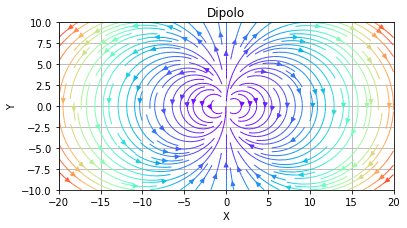

In [7]:
def dFDipolo(x, y):
    return 2*x*y, y*y-x*x

RetratoDipolo = RetratoDeFases2D(dFDipolo, [[-20, 20], [-10, 10]], Densidad=1.5, Titulo='Dipolo', xlabel='X', ylabel='Y')
RetratoDipolo.plot()

## Ejemplo 8: "*Monstruo* de dos ojos" (Ejercicio 6.1.10)

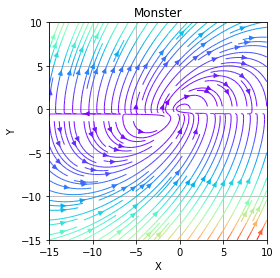

In [9]:
def dFMonster(x, y):
    return y + y*y, -0.5*x + 0.20*y - x*y + 1.20*y*y

RetratoMonster = RetratoDeFases2D(dFMonster, [-15, 10], Densidad=1.5, Titulo='Monster', xlabel='X', ylabel='Y')
RetratoMonster.plot()


## Ejemplo 9: "*Loro*" (Ejercicio 6.1.11)

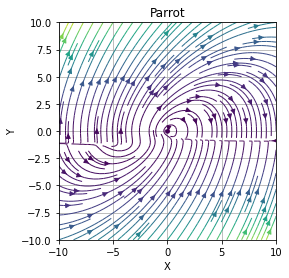

In [42]:
def dFParrot(x, y):
    return y + y*y, -x + 0.20*y - x*y + 1.20*y*y

RetratoParrot = RetratoDeFases2D(dFParrot, [-10, 10], Densidad=1.5, Titulo='Parrot', xlabel='X', ylabel='Y')
RetratoParrot.plot()

## Ejemplo 10: *Fondo de pantalla* (Ejercicio 6.6.3)

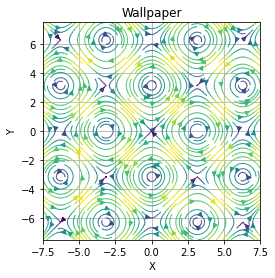

In [43]:
def dFWallpaper(x, y):
    return np.sin(y), np.sin(x)

RetratoWallpaper = RetratoDeFases2D(dFWallpaper, [-7.5, 7.5], Densidad=2, Titulo='Wallpaper', xlabel='X', ylabel='Y')
RetratoWallpaper.plot()

## Ejemplo 11: Exploraciones computacionales #2 y #3

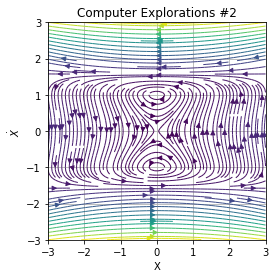

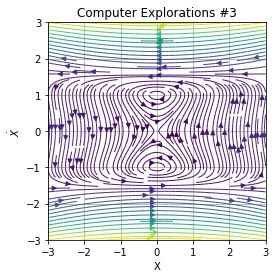

In [44]:
def dFCompEx2(x, y):
    return y - y**3, x*np.cos(y)


def dFCompEx3(x, y):
    return np.sin(y), y**2 - x


RetratoCompEx2 = RetratoDeFases2D(dFCompEx2, [-3, 3], Densidad=2, Titulo='Computer Explorations #2')
RetratoCompEx2.plot()


RetratoCompEx3 = RetratoDeFases2D(dFCompEx2, [-3, 3], Densidad=2, Titulo='Computer Explorations #3')
RetratoCompEx3.plot()

## Ejemplo 12: Péndulo Simple

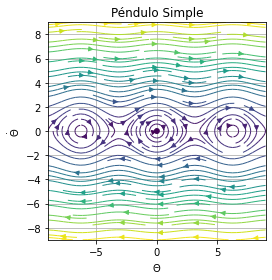

In [45]:
def dFPendulo(theta, v):
    """
    Ejemplo de uso #12: Péndulo simple
    """
    return v, -np.sin(theta)

RetratoPendulo = RetratoDeFases2D(dFPendulo, [-9, 9], Densidad=1.5, Titulo='Péndulo Simple', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
RetratoPendulo.plot()

## Ejemplo 13: Péndulo Simple Amortiguado

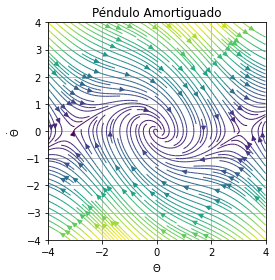

In [46]:
def dFPenduloAmortiguado(theta, v):
    return v, -0.75*v-np.sin(theta)

RetratoPenduloAmortiguado = RetratoDeFases2D(dFPenduloAmortiguado, [-4, 4], Densidad=2, Titulo='Péndulo Amortiguado', xlabel=r"$\Theta$", ylabel=r"$\dot{\Theta}$")
RetratoPenduloAmortiguado.plot()